<a href="https://www.kaggle.com/xujiang1993/boston-airbnb?scriptVersionId=84654948" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Boston Airbnb data analysis

## Introduction
Airbnb becomes one of most popular ways for people to select rental properties and it is important for airbnb to keep large number of people on the platform. This blog is aimed to explore what kind of neighborhoods would be more valuable for airbnb to investigate through respective analysis and which month is better for airbnb to encourage hosts to release more rentals and availabilities. Due to the time availability, this blog would only uses the Boston Airbnb data to do analysis. This work would use review scores rating as the metric (This blog assumes high review scores rating would result in high customer retention). Price per accommodates and availability are other two useful metric to figure out how to improve the situation

This work follows CRISP-DM Process:
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Model Data
5. Results
6. Deploy

This blog only focuses on the data analysis, so there won't be modelling and deployment parts inside. 

## Questions to answer 

To evaluate this, the blog will answer the following questions:

* Can you describe the vibe of each Boston neighborhood using listing descriptions?
* What features of neighborhoods are important for customer book a property?
* What are the busiest times of the year to visit Boston? By how much do prices spike?
* What strategy Airbnb might make to further increase the profit?


## 

## Data Describe

* price: price for one night; **numeric data**
* weekly_price: price for one week; **numeric data**
* monthly_price: price for one month; **numeric data**
* cleaning_fee: cost of cleaning; **numeric data**
* guest_included: maximal guest number; **numeric data**
* minimum_nights: minimum nights; **numeric data**
* latitude and longitude: The geographical information; **numeric data**
* neighbourhood_cleansed: The name of neighbourhood; **text data**
* room_type: Type of room (Entire home/apt, Private room and Shared room); **categorical data**
* accommodates: Numbers of accommodates; **numeric data**
* bathrooms: Numbers of bathrooms; **numeric data**
* bedrooms: Numbers of bedrooms; **numeric data**
* beds: Numbers of beds; **numeric data**
* bed_type: types of beds; **categorical data**
* number_of_reviews: the number of previous reviews; **numeric data**
* cancellation_policy: Policy of cancellation(flexible, moderate, strict and super strict); **categorical data**
* review_scores_rating: Customer scores; **numeric data(from 0 to 100)**
* amentities: What amentites they provide; **text data**

## Import Library

In [1]:
# this is for Airbnb boston data analysis and this work would be one of the outcome of the Udicity data scientist nanodegree project 

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# The lib below are used for WordCloud visualization
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
import collections
import matplotlib.cm as cm


## Data Load

In [2]:
listingsdf = pd.read_csv('../input/boston/listings.csv')
calendardf = pd.read_csv('../input/boston/calendar.csv')
reviewsdf  = pd.read_csv('../input/boston/reviews.csv')

# Business Understanding, Data Understanding, Prepare Data

Airbnb is a community-based online platform for listing and renting local homes which currently have millions of users. It connects hosts and travelers and facilitates the process of renting without owning any rooms itself. The income of Airbnb are mainly from commission fee of every booking. Therefore, how to increase the volume of transactions and how to increase the customer retention are important for Airbnb. This blog will focus on one of the useful metrics 'review_scores_rating' to measure customer satisfaction, and find out what kind of neighborhoods can increase customer retention and which month are good to encourage hosts in the neighborhoods to release more rentals and availabilities. 

## Data Exploring and Data Understanding

In [3]:
# descriptive analysis
listingsdf.head()

id                            listing_url       scrape_id  \
0  12147973  https://www.airbnb.com/rooms/12147973  20160906204935   
1   3075044   https://www.airbnb.com/rooms/3075044  20160906204935   
2      6976      https://www.airbnb.com/rooms/6976  20160906204935   
3   1436513   https://www.airbnb.com/rooms/1436513  20160906204935   
4   7651065   https://www.airbnb.com/rooms/7651065  20160906204935   

  last_scraped                                           name  \
0   2016-09-07                     Sunny Bungalow in the City   
1   2016-09-07              Charming room in pet friendly apt   
2   2016-09-07               Mexican Folk Art Haven in Boston   
3   2016-09-07  Spacious Sunny Bedroom Suite in Historic Home   
4   2016-09-07                            Come Home to Boston   

                                             summary  \
0  Cozy, sunny, family home.  Master bedroom high...   
1  Charming and quiet room in a second floor 1910...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Come experience the comforts of home away from...   
4  My comfy, clean and relaxing home is one block...   

                                               space  \
0  The house has an open and cozy feel at the sam...   
1  Small but cozy and quite room with a full size...   
2  Come stay with a friendly, middle-aged guy in ...   
3  Most places you find in Boston are small howev...   
4  Clean, attractive, private room, one block fro...   

                                         description experiences_offered  \
0  Cozy, sunny, family home.  Master bedroom high...                none   
1  Charming and quiet room in a second floor 1910...                none   
2  Come stay with a friendly, middle-aged guy in ...                none   
3  Come experience the comforts of home away from...                none   
4  My comfy, clean and relaxing home is one block...                none   

                               neighborhood_overview  ... review_scores_value  \
0  Roslindale is quiet, convenient and friendly. ...  ...                 NaN   
1  The room is in Roslindale, a diverse and prima...  ...                 9.0   
2  The LOCATION: Roslindale is a safe and diverse...  ...                10.0   
3  Roslindale is a lovely little neighborhood loc...  ...                10.0   
4  I love the proximity to downtown, the neighbor...  ...                10.0   

  requires_license license jurisdiction_names instant_bookable  \
0                f     NaN                NaN                f   
1                f     NaN                NaN                t   
2                f     NaN                NaN                f   
3                f     NaN                NaN                f   
4                f     NaN                NaN                f   

  cancellation_policy require_guest_profile_picture  \
0            moderate                             f   
1            moderate                             f   
2            moderate                             t   
3            moderate                             f   
4            flexible                             f   

  require_guest_phone_verification calculated_host_listings_count  \
0                                f                              1   
1                                f                              1   
2                                f                              1   
3                                f                              1   
4                                f                              1   

   reviews_per_month  
0                NaN  
1               1.30  
2               0.47  
3               1.00  
4               2.25  

[5 rows x 95 columns]

*listingsdf* include a lot columns and different types of data, such as numeric, categorical, text, url, boolean etc

In [4]:
listingsdf.describe()

id     scrape_id       host_id  host_listings_count  \
count  3.585000e+03  3.585000e+03  3.585000e+03          3585.000000   
mean   8.440875e+06  2.016091e+13  2.492311e+07            58.902371   
std    4.500787e+06  8.516813e-01  2.292781e+07           171.119663   
min    3.353000e+03  2.016091e+13  4.240000e+03             0.000000   
25%    4.679319e+06  2.016091e+13  6.103425e+06             1.000000   
50%    8.577620e+06  2.016091e+13  1.928100e+07             2.000000   
75%    1.278953e+07  2.016091e+13  3.622147e+07             7.000000   
max    1.493346e+07  2.016091e+13  9.385411e+07           749.000000   

       host_total_listings_count  neighbourhood_group_cleansed     latitude  \
count                3585.000000                           0.0  3585.000000   
mean                   58.902371                           NaN    42.340032   
std                   171.119663                           NaN     0.024403   
min                     0.000000                           NaN    42.235942   
25%                     1.000000                           NaN    42.329995   
50%                     2.000000                           NaN    42.345201   
75%                     7.000000                           NaN    42.354685   
max                   749.000000                           NaN    42.389982   

         longitude  accommodates    bathrooms  ...  review_scores_accuracy  \
count  3585.000000   3585.000000  3571.000000  ...             2762.000000   
mean    -71.084818      3.041283     1.221647  ...                9.431571   
std       0.031565      1.778929     0.501487  ...                0.931863   
min     -71.171789      1.000000     0.000000  ...                2.000000   
25%     -71.105083      2.000000     1.000000  ...                9.000000   
50%     -71.078429      2.000000     1.000000  ...               10.000000   
75%     -71.062155      4.000000     1.000000  ...               10.000000   
max     -71.000100     16.000000     6.000000  ...               10.000000   

       review_scores_cleanliness  review_scores_checkin  \
count                2767.000000            2765.000000   
mean                    9.258041               9.646293   
std                     1.168977               0.762753   
min                     2.000000               2.000000   
25%                     9.000000               9.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                  2767.000000             2763.000000   
mean                      9.646549                9.414043   
std                       0.735507                0.903436   
min                       4.000000                2.000000   
25%                       9.000000                9.000000   
50%                      10.000000               10.000000   
75%                      10.000000               10.000000   
max                      10.000000               10.000000   

       review_scores_value  license  jurisdiction_names  \
count          2764.000000      0.0                 0.0   
mean              9.168234      NaN                 NaN   
std               1.011116      NaN                 NaN   
min               2.000000      NaN                 NaN   
25%               9.000000      NaN                 NaN   
50%               9.000000      NaN                 NaN   
75%              10.000000      NaN                 NaN   
max              10.000000      NaN                 NaN   

       calculated_host_listings_count  reviews_per_month  
count                     3585.000000        2829.000000  
mean                        12.733891           1.970908  
std                         29.415076           2.120561  
min                          1.000000           0.010000  
25%                          1.0000

A lot of columns have missing values especially for optional options to be filled in by the hosts or customers

In [5]:
calendardf.head()

listing_id        date available price
0    12147973  2017-09-05         f   NaN
1    12147973  2017-09-04         f   NaN
2    12147973  2017-09-03         f   NaN
3    12147973  2017-09-02         f   NaN
4    12147973  2017-09-01         f   NaN

This dataset include date, and the listing_id could be used to be linked with *listingsdf*.

Only *price* has missing value and it is not the numeric type (need to be converted)

This dataset provide the availability of the property which could be used as an indicator about how popular property is 

In [6]:
reviewsdf.head()

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...

There are the reviewer comments which could be used to explore how guest like the property

This also have *listing_id* which can be used to link other two data set

<AxesSubplot:>

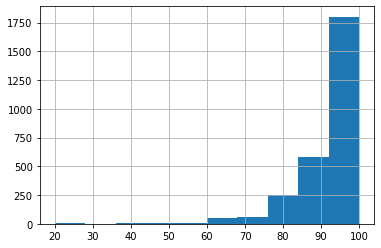

In [7]:
listingsdf['review_scores_rating'].hist()
#np.exp(listingsdf['review_scores_rating']/100).hist()

review_scores_rating would be the most important metric in this blog

the review scores rating concentrate at the range [90-100], exponential could improve this but it also might lose the track on the scale

## Data Preprocessing and Preparing

In [8]:
nbhoods = listingsdf['neighbourhood_cleansed'].unique()    # find the neighborhoods

listingsdf = listingsdf.rename(columns={"id": "listing_id"})    # make the id consistent to other two data sets

calendardf_copy=calendardf.copy()
calendardf_copy['available'] = (calendardf_copy['available']=='t')    # convert string type into boolean data type

listingsdf_copy = listingsdf.copy()
listingsdf_copy['price'] = listingsdf_copy['price'].replace('[\$,]', '', regex=True).astype(float)      # convert string type into number type for price and remove $ sign
listingsdf_copy['price_per_accommodates'] = listingsdf_copy['price']/listingsdf_copy['accommodates']    # create the price per accommodates column which seems better to indicate the price of the rental property

it won't process the missing value here because different questions require different way to process missing values. However, all the missing data in this blog are directly removed according to desired column. This is because the volume of the data is large enough and a lot of the columns with missing value are text data which are difficult to do imputation.

## Question 1: describe the vibe of neighborhood using listing description

This question would use WordCloud to visualize the vibe of neighborhood with neiborhood description

In [9]:
# vibe of each neighborhood

# wordcloud is a good way to vasualize this


# break list of lists into a signle list
def flatten(t):
    '''
    convert the list of lists into a single list
    
    PARAMETER:
    
    INPUT:
    t: the original list of lists
    
    OUTPUT:
    a single list
    
    '''
    
    return [item for sublist in t for item in sublist]

def nhood_wordcloud(listingsdf,nbhoods):
    '''
    This function is to plot WordCloud and top 10 words for given neighborhoods; this function currently only uses 'neighborhood_overview' to visualize data which could be extended in future
    
    PARAMETER:
    
    INPUT:
    listingsdf: listing data (pandas dataframe type)
    nbhoods: The unique neighborhood list (pandas dataframe type)
    
    OUTPUT:
    WordCloud plot and top 10 words plots
    
    '''
    
    # remove missing value
    listingsdf = listingsdf.dropna(subset=['neighborhood_overview'])     # Dropping missing value is because the number of the data is large enough and 'neighborhood_overview' is text data which cannot be imputed

    # set up stopwords and puctuation

    nbhoods_split = [re.findall('[A-Z][^A-Z]*', nbhoods.tolist()[i]) for i in range(len(nbhoods))]  # People sometimes preffer to break the name into couple of single words

    all_stopwords = stopwords.words('english')
    all_stopwords.extend(nbhoods.tolist() + flatten(nbhoods_split) + ["'s",'--','neighborhood','boston','jp','']) # remove meaningless words and the community name
    stop_words = set(all_stopwords + list(string.punctuation))
    stop_words = [x.lower().strip() for x in stop_words]

    tokenizer = nltk.RegexpTokenizer(r"\w+")


    # Group by different neighborhood
    for nbhood in nbhoods:
        word_tokens = tokenizer.tokenize(listingsdf[listingsdf['neighbourhood_cleansed']==nbhood]['neighborhood_overview'].str.cat(sep=' '))
        filtered_sentence = [re.sub(r'\d+', '', word_tokens[i]) for i in range(len(word_tokens))]
        filtered_sentence = [w for w in filtered_sentence if not w.lower() in stop_words]
        
        # Create and generate a word cloud image:
        wordcloud = WordCloud().generate(','.join(filtered_sentence))

        # find the top 10 words in each neighborbood
        counted_words = collections.Counter(filtered_sentence)
        top10words = []
        top10counts = []
        for letter, count in counted_words.most_common(10):
            top10words.append(letter)
            top10counts.append(count)

        print('This is ' + nbhood + ':')

        # Display the generated image:
        f1 = plt.figure()
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()

        print('the top 10 hot topic is about:'+ ','.join(top10words))
        colors = cm.rainbow(np.linspace(0, 1, 10))
        f2 = plt.figure()
        plt.title('Top 10 words  vs their count')
        plt.xlabel('Count')
        plt.ylabel('Words')
        plt.barh(top10words, top10counts, color=colors)
        plt.show()


        print('_____________________________________________________________________________________________________')

This is Roslindale:


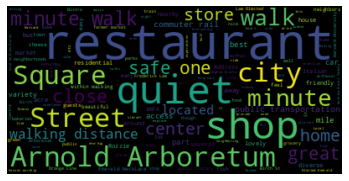

the top 10 hot topic is about:restaurants,walk,Arnold,Arboretum,quiet,public,minute,city,shops,Square


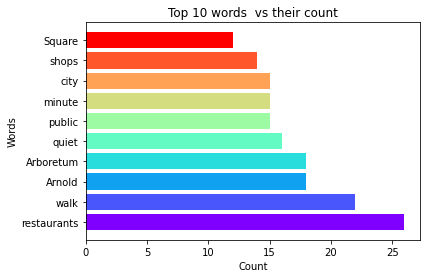

_____________________________________________________________________________________________________
This is Jamaica Plain:


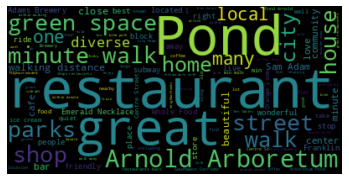

the top 10 hot topic is about:restaurants,walk,Pond,Arboretum,shops,away,great,minute,Arnold,walking


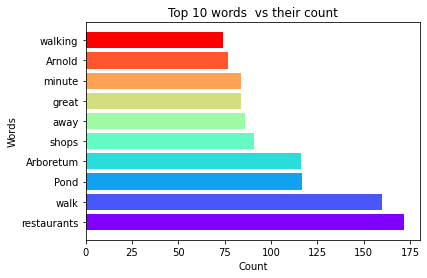

_____________________________________________________________________________________________________
This is Mission Hill:


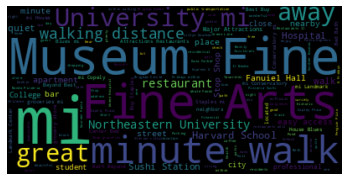

the top 10 hot topic is about:mi,restaurants,walk,Museum,University,Fine,Arts,within,minute,distance


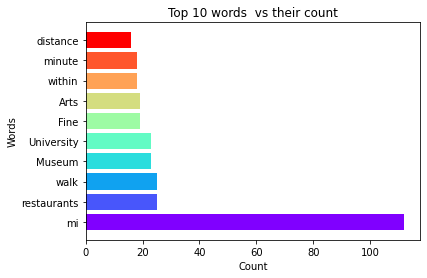

_____________________________________________________________________________________________________
This is Longwood Medical Area:


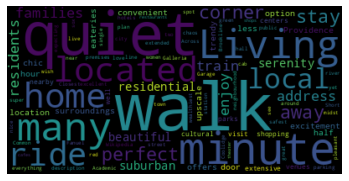

the top 10 hot topic is about:walk,quiet,minute,many,home,ride,local,located,away,families


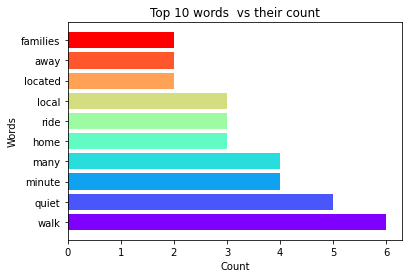

_____________________________________________________________________________________________________
This is Bay Village:


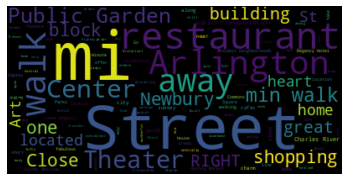

the top 10 hot topic is about:mi,walk,min,Arlington,away,public,Street,restaurants,Center,Close


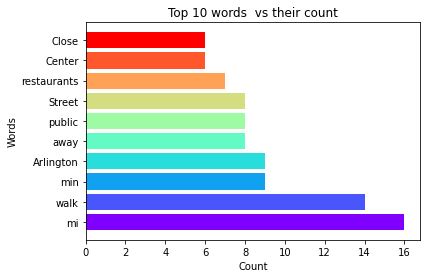

_____________________________________________________________________________________________________
This is Leather District:


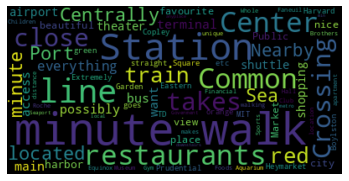

the top 10 hot topic is about:minute,walk,Station,line,restaurants,Common,Crossing,takes,train,close


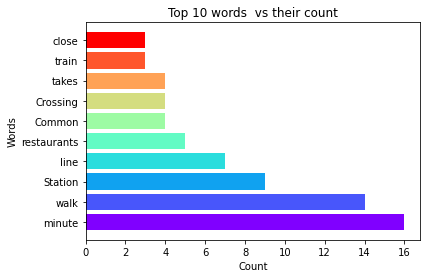

_____________________________________________________________________________________________________
This is Chinatown:


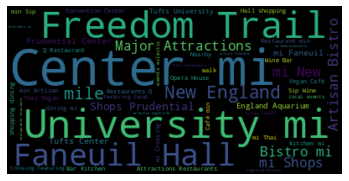

the top 10 hot topic is about:mi,Center,min,Tufts,University,New,Prudential,Attractions,House,Freedom


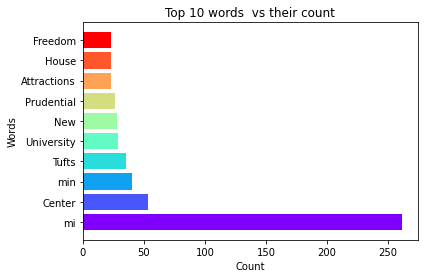

_____________________________________________________________________________________________________
This is North End:


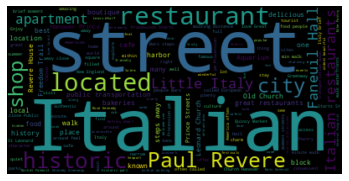

the top 10 hot topic is about:restaurants,Italian,walk,Italy,located,historic,away,Church,one,Paul


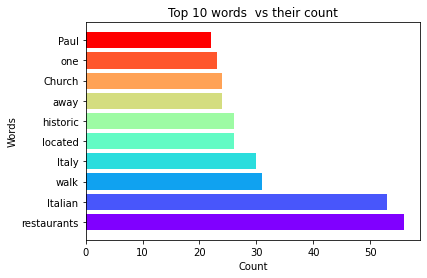

_____________________________________________________________________________________________________
This is Roxbury:


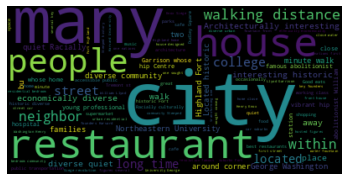

the top 10 hot topic is about:diverse,one,city,historic,Fort,home,community,quiet,street,restaurants


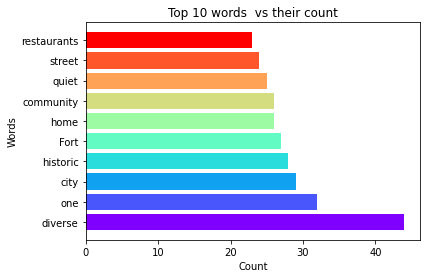

_____________________________________________________________________________________________________
This is South End:


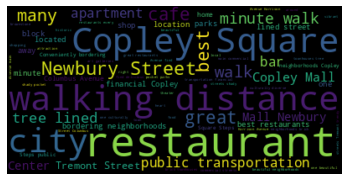

the top 10 hot topic is about:restaurants,Copley,walk,Street,one,neighborhoods,best,many,shops,Square


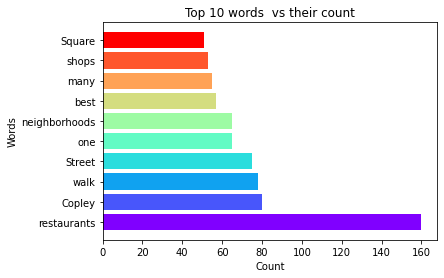

_____________________________________________________________________________________________________
This is Back Bay:


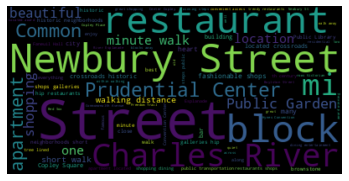

the top 10 hot topic is about:restaurants,Newbury,shopping,walk,Street,shops,Prudential,Center,Charles,historic


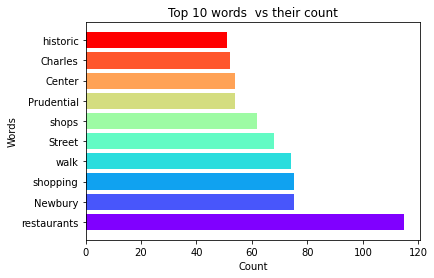

_____________________________________________________________________________________________________
This is East Boston:


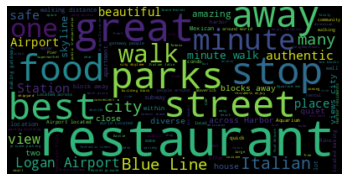

the top 10 hot topic is about:away,restaurants,city,walk,best,Italian,food,Airport,many,great


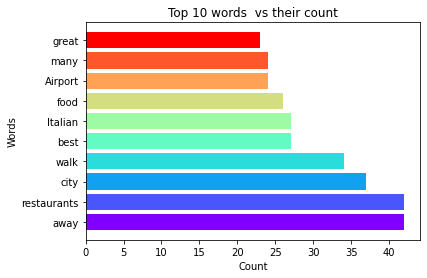

_____________________________________________________________________________________________________
This is Charlestown:


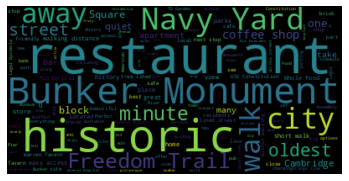

the top 10 hot topic is about:Bunker,restaurants,walk,Navy,historic,Yard,Monument,away,city,Freedom


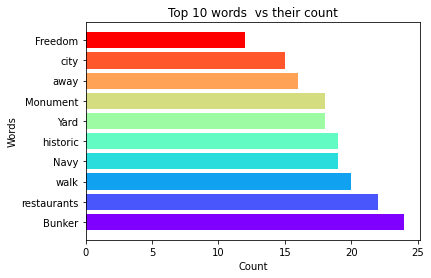

_____________________________________________________________________________________________________
This is West End:


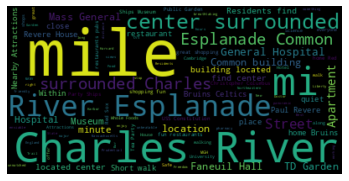

the top 10 hot topic is about:miles,Charles,Common,River,Esplanade,mi,center,surrounded,Garden,Hospital


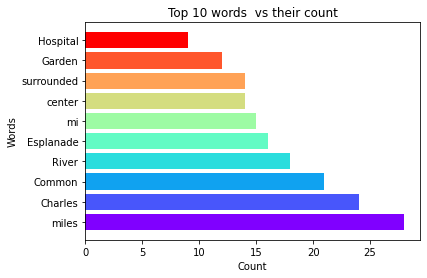

_____________________________________________________________________________________________________
This is Beacon Hill:


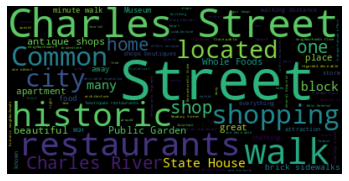

the top 10 hot topic is about:Charles,Street,restaurants,one,shops,walk,historic,streets,street,neighborhoods


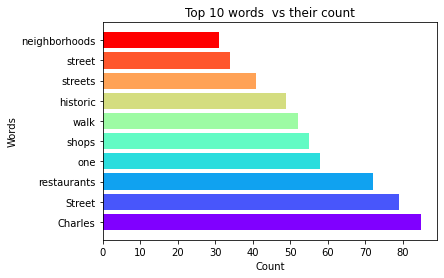

_____________________________________________________________________________________________________
This is Downtown:


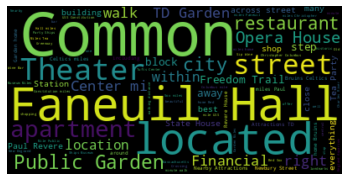

the top 10 hot topic is about:mi,miles,Common,House,Garden,restaurants,Hall,located,Faneuil,Center


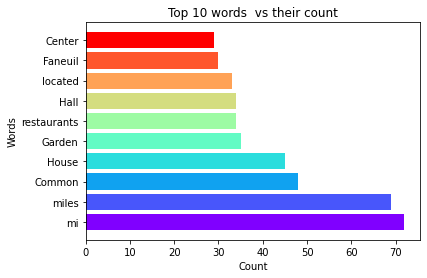

_____________________________________________________________________________________________________
This is Fenway:


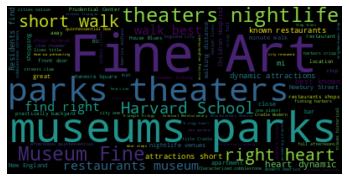

the top 10 hot topic is about:restaurants,mi,walk,heart,Museum,parks,dynamic,Harvard,theaters,right


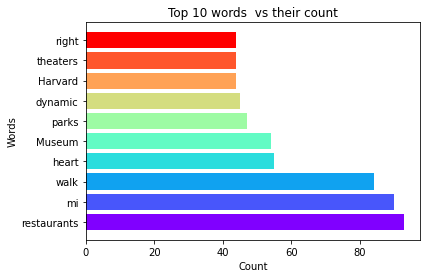

_____________________________________________________________________________________________________
This is Brighton:


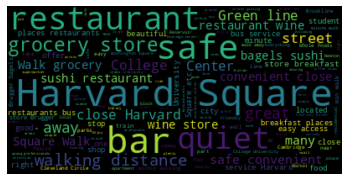

the top 10 hot topic is about:restaurants,Harvard,Square,close,safe,store,walk,away,places,bars


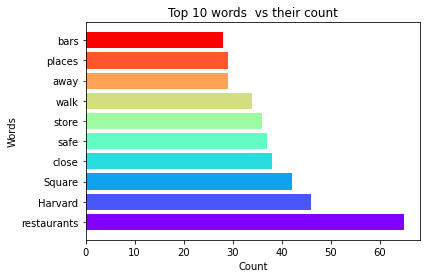

_____________________________________________________________________________________________________
This is West Roxbury:


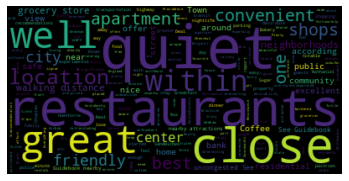

the top 10 hot topic is about:restaurants,quiet,great,well,within,close,best,one,shops,apartment


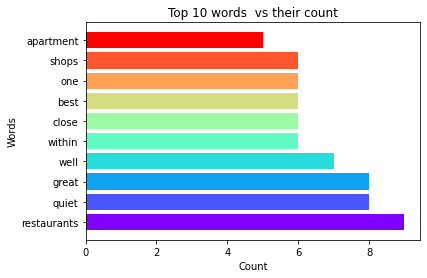

_____________________________________________________________________________________________________
This is Hyde Park:


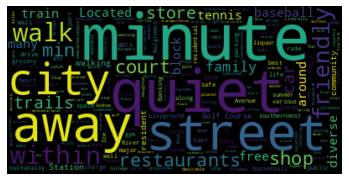

the top 10 hot topic is about:quiet,away,street,minutes,walk,minute,city,within,friendly,restaurants


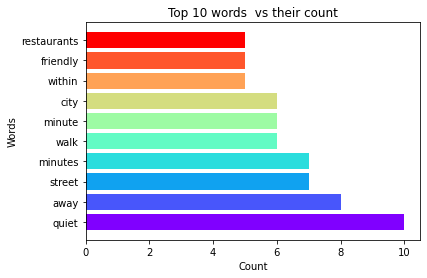

_____________________________________________________________________________________________________
This is Mattapan:


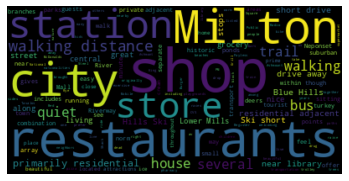

the top 10 hot topic is about:walking,shops,near,Milton,adjacent,drive,city,distance,residential,library


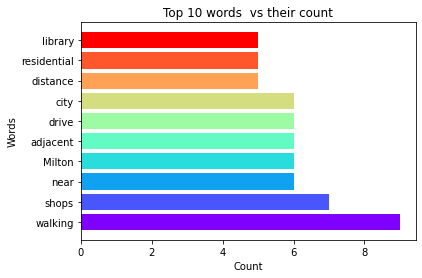

_____________________________________________________________________________________________________
This is Dorchester:


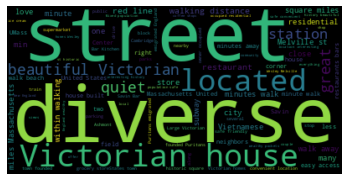

the top 10 hot topic is about:restaurants,walk,minutes,Victorian,away,residential,house,diverse,many,quiet


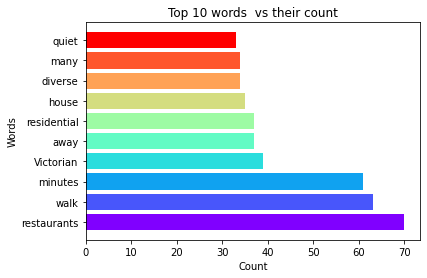

_____________________________________________________________________________________________________
This is South Boston Waterfront:


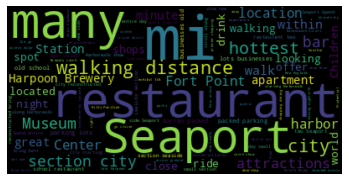

the top 10 hot topic is about:mi,city,Seaport,restaurants,many,walking,distance,section,hottest,located


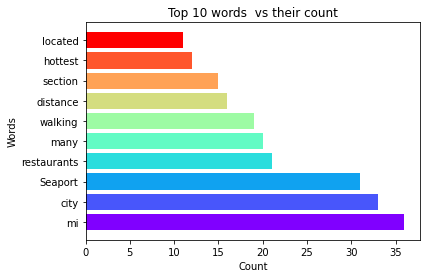

_____________________________________________________________________________________________________
This is South Boston:


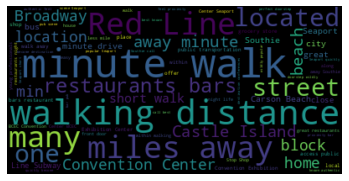

the top 10 hot topic is about:walk,restaurants,away,Seaport,minute,Southie,bars,Center,distance,miles


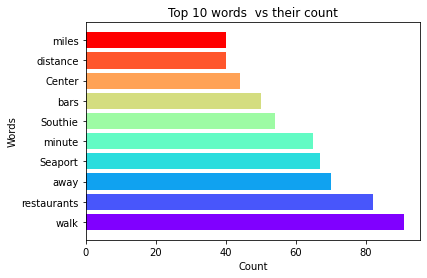

_____________________________________________________________________________________________________
This is Allston:


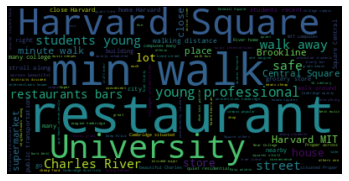

the top 10 hot topic is about:Harvard,walk,restaurants,Square,students,bars,Cambridge,away,min,quiet


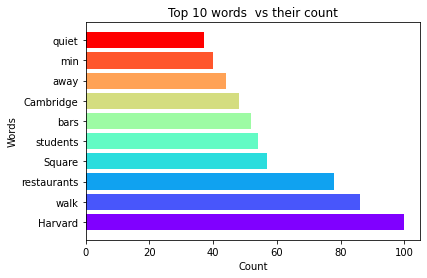

_____________________________________________________________________________________________________


In [10]:
nhood_wordcloud(listingsdf,nbhoods)

According to the wordcloud and histogram of top 10 words in neighborhood description, the neighborhoods in Boston is generally **quiet** and **convenient to location**. Additionally, **resterant** and **university** are popular for most of the neighborhood descriptions. 

In some neighborhood, such as **Allston, brighton and Fenway**, mentioned 'university' or 'harvard' in their top 10 list. These areas highly likely have **more students** than other areas.  

The area such as **Bay Village and Back Bay**  have key word 'center' and 'walk' which suggests they are **more closer to the city center**

**Mission Hill and Fenway** mentions 'museum' and 'art' which might be more **attractive to the artitest or people intersted in arts**

...



## Question 2: What features of neighborhoods are important for customer book a property?

### This section would explore more about the review score and price for different neighborhood. 

<AxesSubplot:>

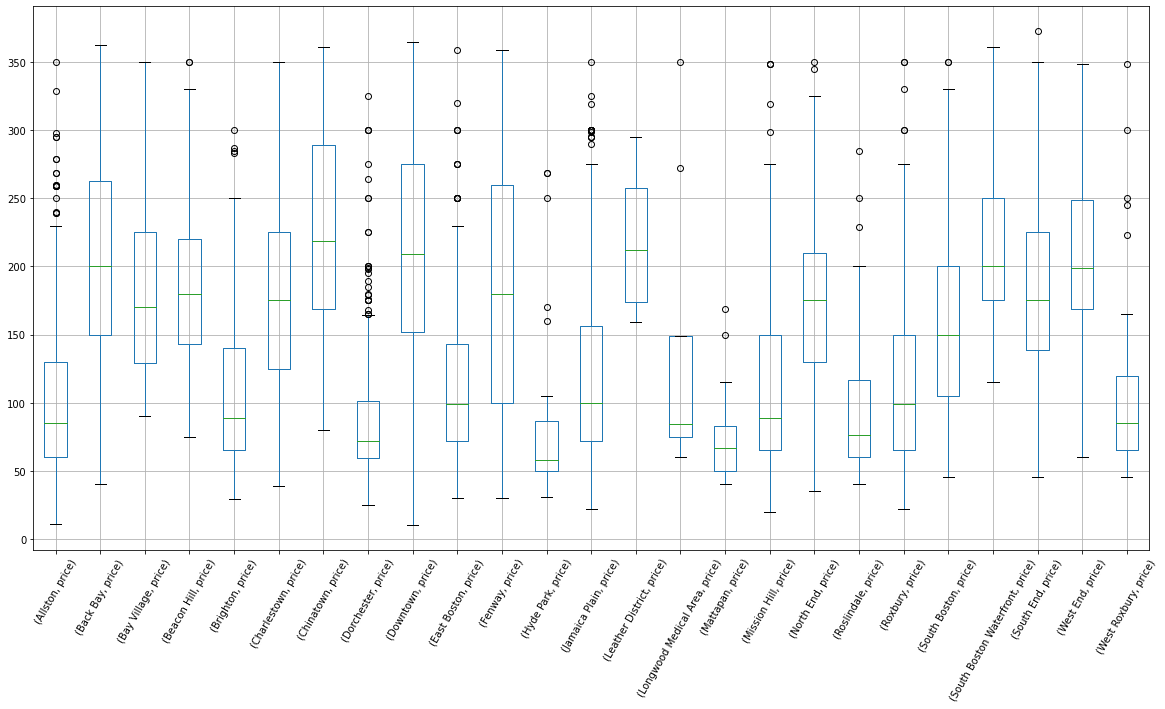

In [11]:
listings_filtered = listingsdf_copy[listingsdf_copy['price'] < listingsdf_copy['price'].quantile(.95)]
listings_filtered.groupby(['neighbourhood_cleansed']).boxplot(column='price',subplots=False,rot=60,figsize=(20,10))

This plot omited the top 5% data to make boxplot easier observe

The mean value of each neiborhood is given below:

In [12]:
nhood_price_avg = listingsdf_copy.groupby(['neighbourhood_cleansed'])['price_per_accommodates'].mean()
nhood_ratescore_avg = listingsdf_copy.groupby(['neighbourhood_cleansed'])['review_scores_rating'].mean()

### Price and Review Score Visualization by geographic

In [13]:
# This code could visualize the scatter points of each rental properties, but this blog would use choropleth to visualize the price of each neiborhood
#fig = px.scatter_mapbox(listingsdf_copy[listingsdf_copy['price'] < listingsdf_copy['price'].quantile(.95)], lat="latitude", lon="longitude", color='price', zoom=10, mapbox_style='open-street-map',width=1000)
#fig.show()

import json
boston = json.load(open('../input/boston-geojson/map.geojson'))
fig = px.choropleth_mapbox(nhood_price_avg.reset_index(), geojson=boston, featureidkey='properties.name', locations='neighbourhood_cleansed', color='price_per_accommodates',center={"lat": 42.3601, "lon": -71.0589},
                           mapbox_style="carto-positron",
                           zoom=10
                          )
fig.show()

The high price per accommodates area concentrate around the city center

In [14]:
#fig = px.scatter_mapbox(listingsdf_copy, lat="latitude", lon="longitude", color='review_scores_rating', zoom=10, mapbox_style='open-street-map',width=1000)
#fig.show()

fig = px.choropleth_mapbox(nhood_ratescore_avg.reset_index(), geojson=boston, featureidkey='properties.name', locations='neighbourhood_cleansed', color='review_scores_rating',center={"lat": 42.3601, "lon": -71.0589},
                           mapbox_style="carto-positron",
                           zoom=10
                          )
fig.show()

Generally, high review score areas are the city center and West Roxbury areas. In opposite, Mission Hill, Roxbury, Dorchester, Fenway seems having lowest review rates. 

Leather district have an incredibly high average review rate

Neighborhood correlation ( correlation for average price of each neighborhood):

In [15]:
nhood_price_avg.corr(nhood_ratescore_avg)

0.2959106594050899

point-wise correlation:

In [16]:
listingsdf_copy['price_per_accommodates'].corr(listingsdf_copy['review_scores_rating'])

0.08343065561090962

price per accommodates and rating score have a weakly positive correlation. This suggests that price could affect the rating score, but it normally is not the key factor

### the following work would investigate what kind of neighboorhoods are more more likely to gain higher customer review scores

This is Leather District:


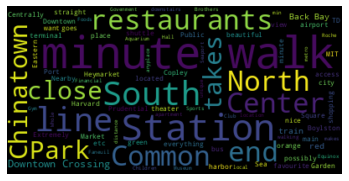

the top 10 hot topic is about:minute,walk,Station,South,line,North,restaurants,Chinatown,end,Common


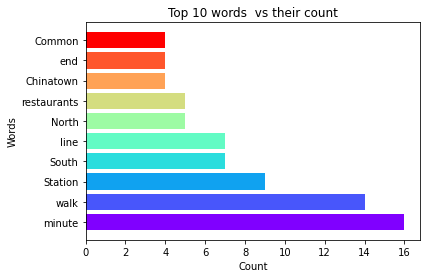

_____________________________________________________________________________________________________
This is Roslindale:


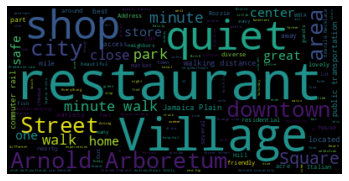

the top 10 hot topic is about:restaurants,walk,Arnold,Arboretum,area,quiet,public,minute,downtown,city


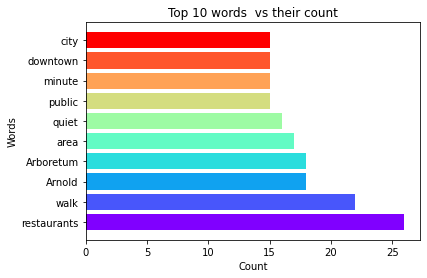

_____________________________________________________________________________________________________
This is West Roxbury:


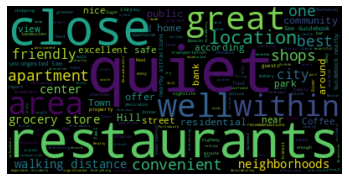

the top 10 hot topic is about:restaurants,quiet,great,well,within,close,area,best,one,shops


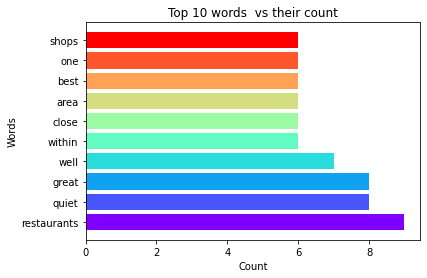

_____________________________________________________________________________________________________


In [17]:
# try the following code which will show you common feature of high price neighborhood 

#nbhoods = nhood_price_avg.reset_index()[nhood_price_avg.reset_index()['price_per_accommodates']>70]['neighbourhood_cleansed'].unique()
#nhood_wordcloud(listingsdf,nbhoods)

## try to look at the average price over 200 neighborhood, they all related to the 'center','walk','mins','shop' which suggest the higher price more corrlate to the convenient location
## only one exception which is South Boston Waterfront, but this neiborhood has seaport and customer might normally be willing to pay more for the sea view 
###########################################################################

nbhoods = nhood_ratescore_avg.reset_index()[nhood_ratescore_avg.reset_index()['review_scores_rating']>95]['neighbourhood_cleansed'].unique()
nhood_wordcloud(listingsdf,nbhoods)


Let's look at the top 10 words for high rating areas. The high rating areas could be closed to the city center but it also could be far away. Generally 'quiet' and 'walk' could be frequent words for high rating areas. This might suggests customer perfer to give high score for quiet and convenient neighborhoods. This is not an end of the conclusion - more data and investigation are required to confirm this.

## Question 3: What are the busiest times of the year to visit Boston? By how much do prices spike?

Text(0, 0.5, 'availability rate')

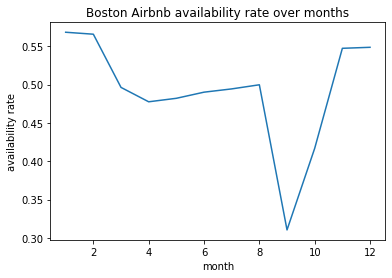

In [18]:
calendardf_copy['month'] = pd.DatetimeIndex(calendardf_copy['date']).month
ax1 = calendardf_copy.groupby('month')['available'].mean().plot(title='Boston Airbnb availability rate over months')
ax1.set_ylabel("availability rate")

**Sep** and **Otc** have the lowest availability rate which suggests these are the busiest time of the year to visit Boston 

In [19]:
calendardf_dropna = calendardf.dropna(subset=['price'])   

Here we need to drop price missing rows - we want to see how real data distributed across the months so we don't want to do imputation. Additionally, calendar data is large enough (~1,300,000 rows) and dropping missing value won't cause significant bias. 


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'price')

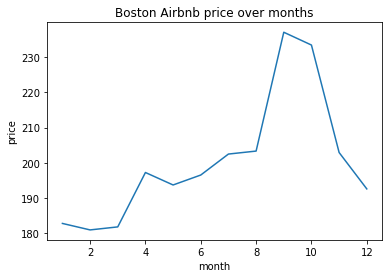

In [20]:
calendardf_dropna['price'] = calendardf_dropna['price'].replace('[\$,]', '', regex=True).astype(float)
calendardf_dropna['month'] = pd.DatetimeIndex(calendardf_dropna['date']).month
ax2 = calendardf_dropna.groupby('month')['price'].mean().plot(title='Boston Airbnb price over months')
ax2.set_ylabel("price")

In general, the price spike happens from **Sep** to **Oct** for Boston (above 230 dollar per night).  

## Question 4: What strategy Airbnb might make to further increase the profit? 

In [21]:
merged_pd = pd.merge(calendardf_copy, listingsdf_copy, on="listing_id")
availability_avg = merged_pd.groupby(['neighbourhood_cleansed'])['available'].mean().sort_values()
availability_avg

neighbourhood_cleansed
Mission Hill               0.356562
Allston                    0.361359
Leather District           0.397260
Fenway                     0.409665
South Boston Waterfront    0.441558
Beacon Hill                0.448425
North End                  0.451787
South End                  0.454416
Brighton                   0.462036
Jamaica Plain              0.493167
Downtown                   0.494782
Chinatown                  0.503068
Hyde Park                  0.506584
Longwood Medical Area      0.514460
Back Bay                   0.517736
South Boston               0.519304
Charlestown                0.525040
East Boston                0.534995
Roxbury                    0.566134
West End                   0.608331
West Roxbury               0.612329
Dorchester                 0.647624
Bay Village                0.654338
Roslindale                 0.662476
Mattapan                   0.765068
Name: available, dtype: float64

In [22]:
fig = px.choropleth_mapbox(availability_avg.reset_index(), geojson=boston, featureidkey='properties.name', locations='neighbourhood_cleansed', color='available',center={"lat": 42.3601, "lon": -71.0589},
                           mapbox_style="carto-positron",
                           zoom=10
                          )
fig.show()

Some neighborhoods with high review scores and high price per accommodates have low availability, such as Leather District and South Boston Waterfront. It might be worthwhile in future to promote more hosts in these areas to gain more profit.    

Additionally, some of the areas, such as Beacon Hill and Fenway, have high price per accommodates and low availability but it has low review score. Therefore, it might be valuable to do somethings for these areas to improve customer experience and have more hosts.

Some high availability area such as Roslindale and Mattapan might need further price reduction or more ad to attract more customers.

However, the availability does not equivalent to the bookings - some hosts might only want to limited days to rent out. Therefore, the final decision making might need more evidence and statistic experiment supports.

array([<AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>, <AxesSubplot:xlabel='month'>,
       <AxesSubplot:xlabel='month'>], dtype=object)

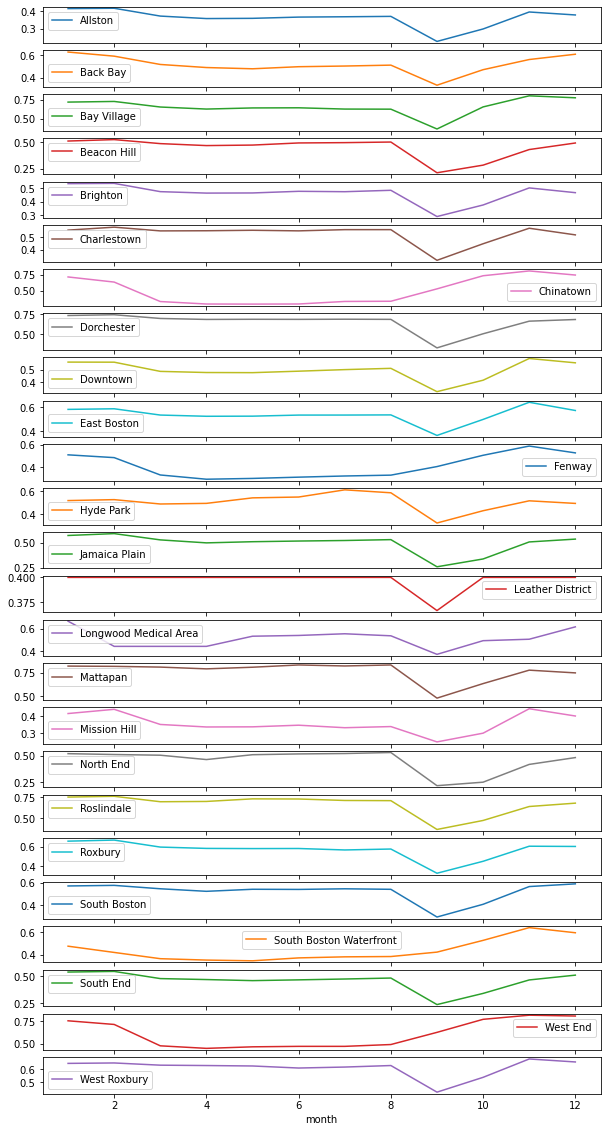

In [23]:
merged_pd.groupby(['month','neighbourhood_cleansed'])['available'].mean().unstack().plot(figsize=(10,20),subplots=True)

The busiest time for neighborhoods are generally Sep and Oct. However, some of neighborhoods have different busy time such as Longwood Medical Area (Feb - April), West End (March - August), Chinatown (April - Aug) and Fenway (April - Aug). Therefore, the ad time for these three can be different to others.

### 

# Summary

This blog has done following things which can support airbnb business:
* the general vibe of Boston airbnb is good resterant, university, quiet and convenient 
* the key attractive features of neighborhoods are also quiet and convenient
* The busiest time and price spikes for Boston airbnb are around Sep and Oct
* The good strategy depends on the availability, price per accommodate and customer review scores of each neighborhood. Generally, it should be worthwhile to promote more hosts in low availability areas and improve customer satisction in lower review scores area. The price of neighborhood could be info to determine whether it is good to improve the customer satisfaction and availability through adjusting price.


Due to the limited time availability, this blog only shows couple of the initial analysis for Boston data. The result still needs to be confirmed with more data and stastic methods (such as ABtest). The specific business solution needs to consider more business insights and info. The future work could be:
* Further investigate how other factors would influence the customer reviews rating, price per accommodates and availability, such as cancellation policy, room types, amentities, cleaning fee, the number of guest etc.
* Do more WordCloud visualization for other comments, such as customer comments, summary, space description, shown name, description, notes, transit, access, interaction, house rules etc. to dig out more info about what are important to increase booking numbers
* List out some potential response actions to improve the booking numbers based on business operation experience and do A/B test to test the most promising actions


